In [1]:
import sys
import os

sys.path.append("../modules")

import pandas as pd
import numpy as np

In [2]:
from data_cleaning import load_data

df = load_data("../data/climate.csv")
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [4]:
df_ml = df[['AverageTemperature', 'AverageTemperatureUncertainty']]

In [5]:
from data_cleaning import simple_impute

df_simple = simple_impute(df_ml)

df_simple.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
dtype: int64

In [6]:
from symmetry_analysis import symmetry_report

symmetry_df = symmetry_report(df_simple)
symmetry_df

,Feature,Mean,Median,Skewness,Distribution
0,AverageTemperature,18.125969,19.841,-0.958068,Left-Skewed
1,AverageTemperatureUncertainty,0.969343,0.632,2.980036,Right-Skewed


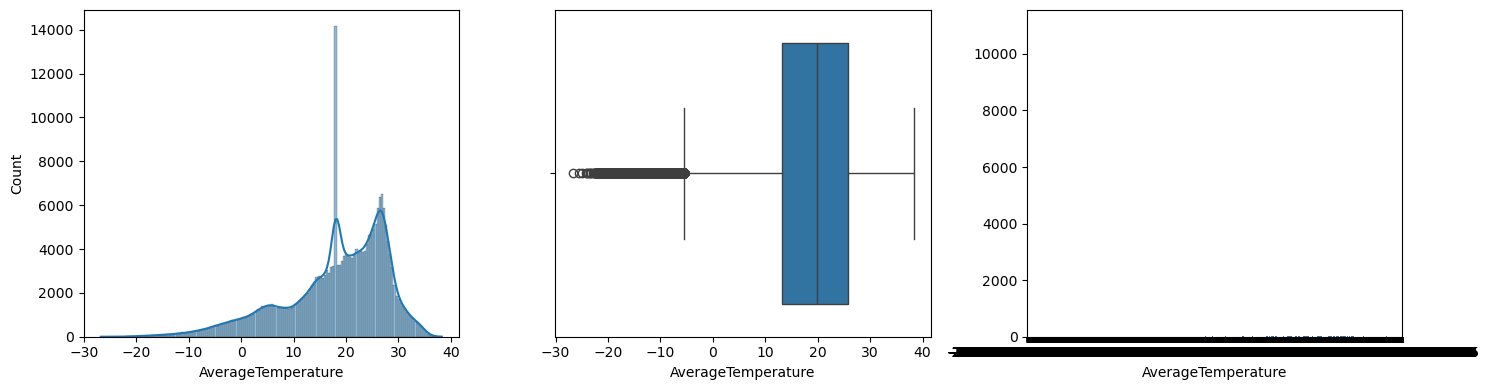

In [20]:
from visualization import plot_univariate

plot_univariate(df_simple, "AverageTemperature")

In [8]:
df_simple["Temp_Class"] = (df_simple["AverageTemperature"] > 
                           df_simple["AverageTemperature"].median()).astype(int)

X = df_simple[['AverageTemperatureUncertainty']]
y = df_simple['Temp_Class']

In [25]:
med_val =  df_simple["AverageTemperature"].median()
med_val

19.841

In [ ]:
from supervised_models import (
    id3_classifier,
    bayes_classifier,
    mlp_classifier
)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

dt = id3_classifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.5819327145524988

In [ ]:
nb = bayes_classifier()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, nb.predict(X_test))

0.5418234523510884

In [21]:
mlp = mlp_classifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy_score(y_test, mlp.predict(X_test))

0.5956601722552053

In [22]:
from metrics import classification_metrics

classification_metrics(y_test, y_pred)

{'Accuracy': np.float64(0.5956601722552053),
 'Precision': np.float64(0.5677949404996454),
 'Recall': np.float64(0.8028694804290291),
 'Specificity': np.float64(0.3882428400122703),
 'F1': np.float64(0.6651740891622716)}

In [23]:
import joblib

joblib.dump(dt, "../models/id3_climate_model.pkl")


['../models/id3_climate_model.pkl']